In [29]:
import numpy as np

def get_edge_points_from_coords(coords, mask):
    # Create a set of all points for quick lookup
    point_set = set(map(tuple, coords))
    
    # List to hold edge points
    edge_points = []

    # Define the 8 possible directions (N, NE, E, SE, S, SW, W, NW)
    directions = [(-1, 0), (-1, 1), (0, 1), (1, 1), 
                  (1, 0), (1, -1), (0, -1), (-1, -1)]

    # Check each point in the coords
    for point in coords:
        y, x = point
        is_edge = False
        for dy, dx in 4:
            neighbor = (y + dy, x + dx)
            if neighbor not in point_set:
                is_edge = True
                break
        if is_edge:
            edge_points.append(point)

    return np.array(edge_points)


In [30]:
import cv2
import matplotlib.pyplot as plt

def plot_edge_points(image, edge_points, color=(0, 255, 0), radius=1):
    image = np.asarray(image)
    
    for point in edge_points:
        cv2.circle(image, (point[1], point[0]), radius, color, -1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Edge Points")
    plt.show()
    return image


In [31]:
# Example mask (for demonstration purposes)
mask = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
])

# Extract coordinates from the mask
coords = np.column_stack(np.where(mask))

# Example image (for demonstration purposes)
image = np.zeros((20, 20, 3), dtype=np.uint8)

# Get the edge points from the coordinates
edge_points = get_edge_points_from_coords(coords, mask)
print(len(edge_points))
# Plot the edge points on the image
plot_edge_points(image, edge_points)


TypeError: 'int' object is not iterable

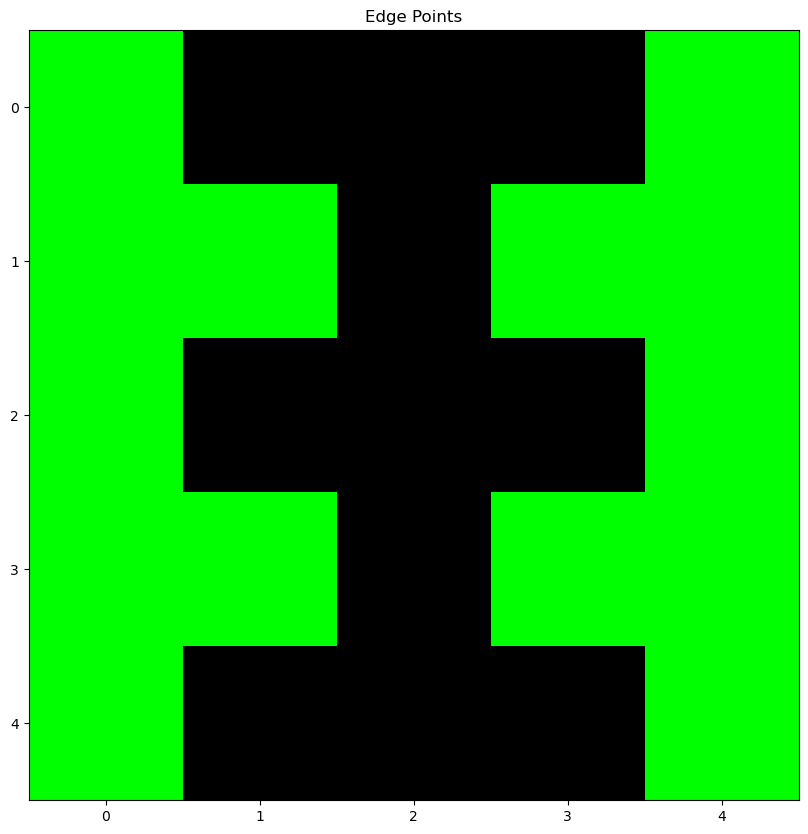

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]]], dtype=uint8)

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_edge_points_from_mask_contours(mask):
    # Ensure mask is in the correct format (uint8)
    if mask.dtype != np.uint8:
        mask = mask.astype(np.uint8)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract edge points from contours
    edge_points = []
    for contour in contours:
        for point in contour:
            edge_points.append(point[0])
    
    return np.array(edge_points)

def plot_edge_points(image, edge_points, color=(0, 255, 0), radius=1):
    image = np.asarray(image)
    
    for point in edge_points:
        cv2.circle(image, (point[0], point[1]), radius, color, -1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Edge Points")
    plt.show()
    return image

# Example mask (for demonstration purposes)
mask = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
], dtype=np.uint8)

# Example image (for demonstration purposes)
image = np.zeros((5, 5, 3), dtype=np.uint8)

# Get the edge points from the mask using contours
edge_points = get_edge_points_from_mask_contours(mask)

# Plot the edge points on the image
plot_edge_points(image, edge_points)
